## Table of Content
1. [Gathering Data](#gather)

    1.1 [archived tweet dataframe](#arch)
    
    1.2 [image prediction tsv](#image)
    
    1.3 [tweet_json dataframe](#json) 
    
2. [Assessing Data](#asses)

    2.1 [Assessing archive_tweet](#asses1)
    
    2.2 [Assessing image_predict df](#asses2)
    
    2.3 [Assessing df_tweet_json](#asses3)
    
    2.4 [Quality and Tidy Issues](#iss)
    
3. [Cleaning Data](#clean)

4. [Store](#store) 

5. [Analyzing Data and Visualization](#analyze)

In [1]:
import pandas as pd
import zipfile
import numpy as np
import requests
import bs4
from bs4 import BeautifulSoup
import json
import time
import os
import datetime
import string
import matplotlib.pyplot as plt
import math
import tweepy
import seaborn as sns
from timeit import default_timer as timer

### 1. Gathering Data
<a id="gather"></a>

#### 1.1. Gathering arhived tweet dataframe
<a id="arch"></a>

In [2]:
archive_tweet=pd.read_csv("twitter-archive-enhanced.csv")
archive_tweet.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


#### 1.2. Gathering image prediction tsv
<a id="image"></a>

In [3]:
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

In [4]:
result=requests.get(url)

In [5]:
open('image_prediction.tsv', 'wb').write(result.content)

335079

In [6]:
image_predictions = pd.read_csv('image_prediction.tsv', sep='\t')
image_predictions.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


#### 1.3. Gathering tweet json dataframe
<a id="json"></a>

In [7]:
from tweepy import OAuthHandler
from timeit import default_timer as timer

In [8]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)


# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor

# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = twitter_archive.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
#            pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [9]:
# extracting file from the zipfile
with open('tweet-json.zip','rb') as f:
    z_tweets = zipfile.ZipFile(f)
    z_tweets.extractall()

# check for the extracted file
z_tweets.namelist()

['tweet-json copy']

In [10]:
# reading the file in DataFrame
with open('tweet-json copy', 'r') as f:
    tweet_json = pd.read_json(f, lines= True, encoding = 'utf-8')

# check the data
tweet_json.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [11]:
# checking for the columns names 
tweet_json.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [12]:
# getting three required columns
tweet_json = tweet_json.loc[:,['id','favorite_count','retweet_count']]

# check for the top 5 rows
tweet_json.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


### 2. Assessing Data
<a id="asses"></a>

#### 2.1. Assessing achived tweet dataframe
<a id="asses1"></a>

In [13]:
# sample rows
archive_tweet.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2069,671134062904504320,NaN,NaN,2015-11-30 01:10:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Clarence. He's a western Alkaline...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671134062...,8,10,Clarence,None,None,None,None
1398,699775878809702401,NaN,NaN,2016-02-17 02:02:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Fillup. Spaghetti is his main weakness. A...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699775878...,11,10,Fillup,None,None,None,None
1892,674754018082705410,6.747522e+17,4.196984e+09,2015-12-10 00:54:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Just received another perfect photo of dogs an...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674754018...,12,10,None,None,None,None,None
2327,666407126856765440,NaN,NaN,2015-11-17 00:06:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a southern Vesuvius bumblegruff. Can d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666407126...,7,10,a,None,None,None,None
849,766008592277377025,NaN,NaN,2016-08-17 20:27:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Angel. She stole the @ShopWeRateDogs s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/766008592...,11,10,Angel,None,None,None,None
791,773704687002451968,NaN,NaN,2016-09-08 02:09:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Loki. He knows he's adorable. One ear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/773704687...,12,10,Loki,None,None,None,None
1270,709449600415961088,NaN,NaN,2016-03-14 18:42:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Karma. She's just a head. Lost body durin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709449600...,10,10,Karma,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None
1234,712717840512598017,NaN,NaN,2016-03-23 19:09:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please don't send in any more polar bears. We ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712717840...,10,10,None,None,None,None,None
1863,675372240448454658,NaN,NaN,2015-12-11 17:51:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...","The tail alone is 13/10. Great dog, better own...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/675372240...,13,10,None,None,None,None,None


In [14]:
# check information about column
archive_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
# check for missing values 
archive_tweet.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [16]:
# duplicate values
archive_tweet[archive_tweet.duplicated()].shape[0]

0

In [17]:
# unique names
archive_tweet["name"].nunique()

957

In [18]:
archive_tweet.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [19]:
# check for source column
archive_tweet.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [20]:
# unique rating_numerator 
archive_tweet.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

#### 2.2. Assesing image prediction tsv
<a id="asses2"></a>

In [21]:
image_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [22]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
# check url link for duplicate
image_predictions[image_predictions["jpg_url"].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


In [24]:
# count of image numbers 
image_predictions["img_num"].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

#### 2.3 Assesing image prediction tsv
<a id="asses3"></a>

In [25]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [26]:
# checking for duplicate entries
tweet_json[tweet_json.duplicated()]

,id,favorite_count,retweet_count


#### 2.4 Quality and Tidy Issues
<a id="iss"></a>


#### Archived_tweet

1. timestamp, retweet_status_timestmp are type objects, need to change into datetime type.
2. missing data: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls
3. "source" column has HTML tage
4. retweets indicate that there are duplicate tweets
5. name column has "None" for name of dog and some names are lower case
6. rating_numerator and rating_denominaotr have incorrect entries and they are in object type

#### image_predictions df

1. tweet_id is integer type
2. jpg_url which means there is duplicate link
3. column names are not meaningful
4. breed names in p1, p2, p3 have underscore, and in lowercase and prediction confidence level is given as decimals

#### df_tweet_json

1. No duplicated entries
2. id is integer type 


#### Tidiness

1. Dog stages of dog have four seperate columns, these columns can be formed into one column
2. archive_tweet df, image_predictions and df_tweet_json can be formed into one datagrame by joining betweet tweet_id and id

### 3. Cleaning Data
<a id="clean"></a>

In [27]:
# making copies of three df
archive_tweet_v1=archive_tweet.copy()
image_predictions_v1=image_predictions.copy()
tweet_json_v1=tweet_json.copy()

In [28]:
print(archive_tweet_v1.tweet_id.dtype)
print(image_predictions_v1.tweet_id.dtype)
print(tweet_json_v1.id.dtype)

int64
int64
int64


#### Define
#### 1. Change tweet_id columns (id columns in tweet_json) to object type

#### Code

In [29]:
archive_tweet_v1["tweet_id"]=archive_tweet_v1.tweet_id.astype("object")
image_predictions_v1["tweet_id"]=image_predictions_v1["tweet_id"].astype("object")
tweet_json_v1["id"]=tweet_json_v1["id"].astype("object")


#### test

In [30]:
# test
print(archive_tweet_v1.tweet_id.dtype)
print(image_predictions_v1.tweet_id.dtype)
print(tweet_json_v1.id.dtype)


object
object
object


#### Define

#### 2. Combine four columns of dog types:doggo, floofer, pupper, puppo into one column.

#### Code

In [31]:
# extract four columns into one column "dog_type"
archive_tweet_v1["dog_stage"]=archive_tweet_v1["text"].str.extract('(doggo|floofer|pupper|puppo)',expand=True)

In [32]:
# remove four columns 
archive_tweet_v1.drop(["doggo","floofer","pupper","puppo"],axis=1,inplace=True)

#### test

In [33]:
# check for dropping of four columns
archive_tweet_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   399 n

#### Define

#### 3. merge image_predictions df and df_tweet_json to archive_tweet df

In [34]:
# before merging change name "id" to "tweet_id"
tweet_json_v1.rename(columns={"id":"tweet_id"},inplace=True)

#### Code

In [35]:
# merge twitter _acive and tweet_json

archive_tweet_v1 = pd.merge(archive_tweet_v1, tweet_json_v1 , how = 'left' , on = 'tweet_id')


In [36]:
combined_df= pd.merge(archive_tweet_v1, image_predictions_v1 , how = 'inner' , on = 'tweet_id')


#### test

In [37]:
# checking combined dataset
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2075 non-null   object 
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2075 non-null   object 
 4   source                      2075 non-null   object 
 5   text                        2075 non-null   object 
 6   retweeted_status_id         81 non-null     float64
 7   retweeted_status_user_id    81 non-null     float64
 8   retweeted_status_timestamp  81 non-null     object 
 9   expanded_urls               2075 non-null   object 
 10  rating_numerator            2075 non-null   int64  
 11  rating_denominator          2075 non-null   int64  
 12  name                        2075 non-null   object 
 13  dog_stage                   338 n

#### Define

#### 5. Change column "timestamp" as datetime type

#### code

In [38]:
combined_df["timestamp"]=pd.to_datetime(combined_df["timestamp"])

#### test

In [39]:
combined_df["timestamp"].dtype

datetime64[ns, UTC]

#### Define

#### 6. Extract main texts from column "source" that remove HTML tage and put those texts as category type

In [40]:
# get unique type of source from the dataframe
combined_df.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

#### Code

In [41]:
# replace long soure link with its main text
combined_df["source"]=combined_df["source"].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',"Twitter for iphone")
combined_df["source"]=combined_df["source"].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',"Twitter Web Client")
combined_df["source"]=combined_df["source"].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>',"TweetDeck")

In [42]:
# change source type to category
combined_df["source"]=combined_df.source.astype("category")

#### test

In [43]:
# check unique values in source column and check its type
combined_df.source.unique()

[Twitter for iphone, Twitter Web Client, TweetDeck]
Categories (3, object): [Twitter for iphone, Twitter Web Client, TweetDeck]

#### Define

#### 7. 
Replace lowercase dog names to NaN

change all dog names to title case

#### Code

In [44]:

# converted lower names to np.nan
lowers = combined_df.name.str.islower()
combined_df.loc[lowers,'name'] = 'None'
# make all values titled
combined_df.name= combined_df.name.apply(lambda x: x.title())
# relace 'None' with np.nan values
combined_df.name.replace('None', np.nan, inplace= True)

#### test

In [45]:
combined_df.name.value_counts()

Charlie      11
Cooper       10
Tucker       10
Lucy         10
Oliver       10
             ..
Obie          1
Storkson      1
Tug           1
Hall          1
Alexander     1
Name: name, Length: 913, dtype: int64

#### Define

#### 7. Remove duplicate rows from column "jpg_url", so that no duplicate links will posted

#### Code

In [46]:
# dropping duplicate from column jpg_url
combined_df["jpg_url"]=combined_df.drop_duplicates(subset=["jpg_url"],inplace=True)

#### test

In [47]:
combined_df["jpg_url"].duplicated().value_counts()

True     2008
False       1
Name: jpg_url, dtype: int64

In [48]:
combined_df["jpg_url"].value_counts()

Series([], Name: jpg_url, dtype: int64)

In [49]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2009 non-null   object             
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2009 non-null   datetime64[ns, UTC]
 4   source                      2009 non-null   category           
 5   text                        2009 non-null   object             
 6   retweeted_status_id         81 non-null     float64            
 7   retweeted_status_user_id    81 non-null     float64            
 8   retweeted_status_timestamp  81 non-null     object             
 9   expanded_urls               2009 non-null   object             
 10  rating_numerator            2009 non-null   int64           

#### Define

####  8.
Extract rating from text column

get numerator and denominator from rating list

assigned rating_numerator and rating_denominator to the df


#### CODE

In [50]:
#  extract rating from text column
rating = combined_df.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
 # list of rating                                    
rating.columns = ['rating_numerator', 'rating_denominator']
# change rating to float
combined_df['rating_numerator'] = rating['rating_numerator'].astype(float)
combined_df['rating_denominator'] = rating['rating_denominator'].astype(float)

#### test

In [51]:
combined_df["rating_numerator"].value_counts()

12.00      455
10.00      421
11.00      397
13.00      264
9.00       151
8.00        95
7.00        52
14.00       37
5.00        33
6.00        32
3.00        19
4.00        16
2.00         9
1.00         5
0.00         2
44.00        1
24.00        1
121.00       1
99.00        1
13.50        1
1776.00      1
11.27        1
165.00       1
15.00        1
84.00        1
9.75         1
60.00        1
11.26        1
88.00        1
144.00       1
420.00       1
204.00       1
50.00        1
80.00        1
45.00        1
143.00       1
Name: rating_numerator, dtype: int64

In [52]:
combined_df["rating_denominator"].value_counts()

10.0     1991
50.0        3
80.0        2
11.0        2
130.0       1
170.0       1
150.0       1
2.0         1
120.0       1
110.0       1
40.0        1
90.0        1
20.0        1
7.0         1
70.0        1
Name: rating_denominator, dtype: int64

#### Define

#### 9.
Remove rows that have retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp, so that have blank and null retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp will stay

#### CODE

In [53]:
# get df with retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns null values
combined_df=combined_df[combined_df["retweeted_status_id"].isnull()]
combined_df=combined_df[combined_df["retweeted_status_user_id"].isnull()]
combined_df= combined_df[combined_df["retweeted_status_timestamp"].isnull()]

####  test

In [54]:
# check columns retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp
combined_df[["retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"]].describe()

,retweeted_status_id,retweeted_status_user_id
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


#### Define

#### 10. 
In column p1, p2, and p3 replace underscore(_) with space 

change the dog_breed in p1, p2, p3 to title case

Change confidence interval in columns p1_conf, p2_conf, p3_conf to percentage

#### CODE

In [55]:
# replace underscore with space
combined_df["p1"]=combined_df["p1"].str.replace("_"," ")
combined_df["p2"]=combined_df["p2"].str.replace("_"," ")
combined_df["p3"]=combined_df["p3"].str.replace("_"," ")

In [56]:
# get dog breed in title case
combined_df["p1"]=combined_df["p1"].str.title()
combined_df["p2"]=combined_df["p2"].str.title()
combined_df["p3"]=combined_df["p3"].str.title()

In [57]:
# change confidence interval to percentange
combined_df["p1_conf"]=combined_df["p1_conf"].apply(lambda x: round(x*100,2))
combined_df["p2_conf"]=combined_df["p2_conf"].apply(lambda x: round(x*100,2))    
combined_df["p3_conf"]=combined_df["p3_conf"].apply(lambda x: round(x*100,3))                                                    

#### test

In [58]:
# check for space and title case in p1, p2, p3 
# check for percentage in p1_conf, p2_conf, and p3_conf
combined_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,Orange,9.70,False,Bagel,8.59,False,Banana,7.611,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iphone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,32.36,True,Pekinese,9.06,True,Papillon,6.896,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,71.60,True,Malamute,7.83,True,Kelpie,3.138,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iphone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,Paper Towel,17.03,False,Labrador Retriever,16.81,True,Spatula,4.084,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iphone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,Basset,55.57,True,English Springer,22.58,True,German Short-Haired Pointer,17.522,True


#### Define
11.
change column names 
p1 to predition1,
p2 to prediction2,
p3 to prediction3



#### Code


In [59]:
# change column name
combined_df.rename(columns={"p1":"prediction1","p2":"prediction2","p3":"prediction3"}, inplace=True)

#### test
it showed in above that column names got change


## 4. Store
<a id="store"></a>

In [60]:
# save and store
combined_df.to_csv("twitter_archive_master.csv",index=False)

## 5. Analyzing and Visualization
<a id="analyze"></a>

In [61]:
# form  column rating_ratio 
combined_df["rating_ratio"]=combined_df["rating_numerator"]/combined_df["rating_denominator"]

In [62]:
# for analyzing get only needed columns
combined_df_refined=combined_df[['timestamp', 'retweet_count', 'favorite_count', 'rating_ratio','name','prediction1','p1_dog','p1_conf','dog_stage']]

In [63]:
combined_df_refined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 0 to 2074
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   timestamp       1928 non-null   datetime64[ns, UTC]
 1   retweet_count   1928 non-null   float64            
 2   favorite_count  1928 non-null   float64            
 3   rating_ratio    1928 non-null   float64            
 4   name            1303 non-null   object             
 5   prediction1     1928 non-null   object             
 6   p1_dog          1928 non-null   bool               
 7   p1_conf         1928 non-null   float64            
 8   dog_stage       317 non-null    object             
dtypes: bool(1), datetime64[ns, UTC](1), float64(4), object(3)
memory usage: 137.4+ KB


#### Top 10 dog breeds from prediction1 and its relation with rating_ratio

In [64]:
# get df that has prediction of p1 is True
df_p1_true=combined_df_refined[combined_df_refined["p1_dog"]==True]
# get top 10 breed from df that has p1 is True
top10_p1=df_p1_true["prediction1"].value_counts().head(10)
print(top10_p1)

Golden Retriever      128
Labrador Retriever     90
Pembroke               87
Chihuahua              75
Pug                    52
Chow                   38
Pomeranian             38
Samoyed                37
Toy Poodle             37
Malamute               28
Name: prediction1, dtype: int64


In [65]:
top10_p1.describe()

count     10.00000
mean      61.00000
std       32.62923
min       28.00000
25%       37.25000
50%       45.00000
75%       84.00000
max      128.00000
Name: prediction1, dtype: float64

The above shows top 10 dog breeds from predction 1 where prediction is true

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

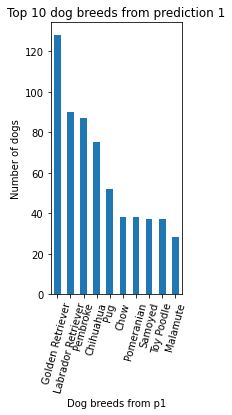

In [66]:
plt.figure(figsize=(8,5))
plt.subplot(1,3,1)
top10_p1.plot(kind="bar")
plt.title("Top 10 dog breeds from prediction 1")
plt.xlabel("Dog breeds from p1")
plt.ylabel("Number of dogs")
plt.xticks(rotation=75)

In [67]:
# top10 dog breed from prediction and rating_ratio
p1_rating_ratio=df_p1_true.groupby("prediction1")["rating_ratio"].mean().sort_values(ascending=False)
print(p1_rating_ratio.head(10))

prediction1
Saluki                1.250000
Briard                1.233333
Irish Setter          1.233333
Border Terrier        1.214286
Tibetan Mastiff       1.200000
Giant Schnauzer       1.200000
Silky Terrier         1.200000
Standard Schnauzer    1.200000
Eskimo Dog            1.177778
Golden Retriever      1.175756
Name: rating_ratio, dtype: float64


The above table shows mean rating_ratio of breed from prediction 1.

In [68]:
# mean confidence level of breed when prediction is True or False
combined_df.groupby("p1_dog")["p1_conf"].mean().sort_values(ascending=False)

p1_dog
True     61.480154
False    53.444334
Name: p1_conf, dtype: float64

The above mean of p1_dog confidence level shows that the neural network has more confidence level when prediction is True.

#### Four dog stages with rating_ratio, and favorite_count

In [69]:
dog_stage_count=combined_df["dog_stage"].value_counts()
dog_stage_count

pupper     218
doggo       69
puppo       27
floofer      3
Name: dog_stage, dtype: int64

In [70]:
# sum of all dog_type count
stage_count_sum=dog_stage_count.sum()
stage_count_sum

317

In [71]:
# maximum proportion of dog_type
max_prop=dog_stage_count.max()/stage_count_sum
print(max_prop)

0.6876971608832808


In [72]:
# getting xticks for proportion of dog_type 
ticks_prop=np.arange(0,max_prop+0.02,0.07)
ticks_prop

array([0.  , 0.07, 0.14, 0.21, 0.28, 0.35, 0.42, 0.49, 0.56, 0.63, 0.7 ])

In [73]:
# formatting xticks 
ticks_name=["{:0.2f}".format(v) for v in ticks_prop]
ticks_name

['0.00',
 '0.07',
 '0.14',
 '0.21',
 '0.28',
 '0.35',
 '0.42',
 '0.49',
 '0.56',
 '0.63',
 '0.70']

Text(0.5, 1.0, 'Proportions of dog stage')

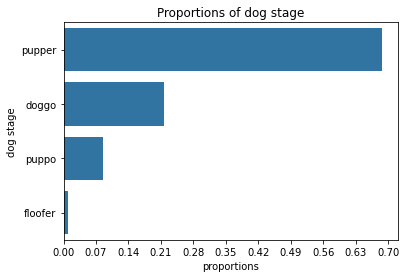

In [74]:
sns.countplot(data=combined_df, y="dog_stage",color=sns.color_palette()[0],order=dog_stage_count.index)
plt.xticks(ticks_prop*stage_count_sum,ticks_name)
plt.ylabel("dog stage")
plt.xlabel("proportions")
plt.title("Proportions of dog stage")


In [75]:
 # proportions of dog dog state
for i in range(0,4):
    print(round((dog_stage_count[i]/stage_count_sum)*100,2))

68.77
21.77
8.52
0.95


The proportion of pupper stage is 68.40%, doggo is 22.08%, puppo is 8.59%, and floofer is 0.92%.


In [76]:
combined_df.groupby(["dog_stage"])["rating_ratio"].mean().sort_values(ascending=False)

dog_stage
floofer    1.266667
puppo      1.214815
doggo      1.160870
pupper     1.054248
Name: rating_ratio, dtype: float64

Eventhough proportion of dog stage is pupper, doggo, puppo, and flooper, the average rating ratio for these four dog stage is in reverse order. That is floofer, puppo, doggo, and pupper has rating ratio from highest to the least.

Calculating average favorite count for dog stage

In [77]:
# average favorite count for each group of dog_stage
combined_df.groupby(["dog_stage"])["favorite_count"].mean().sort_values()

dog_stage
pupper      6706.977064
doggo      15870.579710
puppo      22912.925926
floofer    22929.000000
Name: favorite_count, dtype: float64

In [78]:
# retweet_count for each group of dog_stage
combined_df.groupby(["dog_stage"])["retweet_count"].mean().sort_values()

dog_stage
pupper     2164.568807
doggo      5697.101449
puppo      6824.592593
floofer    8529.000000
Name: retweet_count, dtype: float64

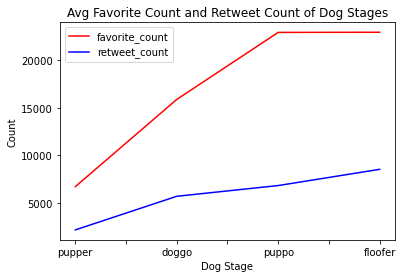

In [79]:
# plotting groupby dog_stage with average favorite_count
combined_df.groupby(["dog_stage"])["favorite_count"].mean().sort_values().plot(color="red")
combined_df.groupby(["dog_stage"])["retweet_count"].mean().sort_values().plot(color="blue")
plt.title("Avg Favorite Count and Retweet Count of Dog Stages")
plt.xlabel("Dog Stage")
plt.ylabel("Count")
plt.legend()

It shows that for all dog stages average count of favorite tweet is greater than retweet count.

#### Correlation between retweet and favourite counts

In [80]:
# set timestamp as index
combined_df.set_index("timestamp",inplace=True)

In [81]:
# correlation when prediction are True or False
combined_df["retweet_count"].corr(combined_df["favorite_count"])


0.9054627708349637

In [82]:
# correlation when prediction is only True
df_p1_true["retweet_count"].corr(df_p1_true["favorite_count"])

0.9030464528499019

Text(0, 0.5, 'retweet_count')

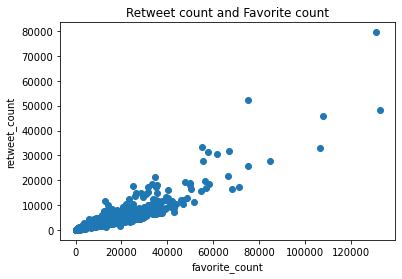

In [83]:
plt.scatter(data=combined_df,x="favorite_count",y="retweet_count")
plt.title("Retweet count and Favorite count")
plt.xlabel("favorite_count")
plt.ylabel("retweet_count")

#### Rating Ratio over time

In [84]:
# drop rows that have rating_ratio greater than 10
combined_df.drop(combined_df[combined_df["rating_ratio"]>10].index, inplace=True)

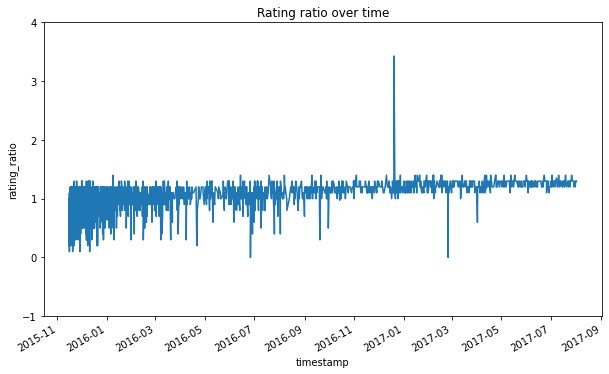

In [85]:
plt.figure(figsize=(10,6))
combined_df["rating_ratio"].plot()
plt.xlabel("timestamp")
plt.ylabel("rating_ratio")
plt.title("Rating ratio over time")
plt.ylim(-1,4)
plt.savefig('ratio_zoom.png')